<a href="https://colab.research.google.com/github/ashishmission93/Ashish-Autonomous-Vehicles-and-Drones-Projects/blob/main/problem_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

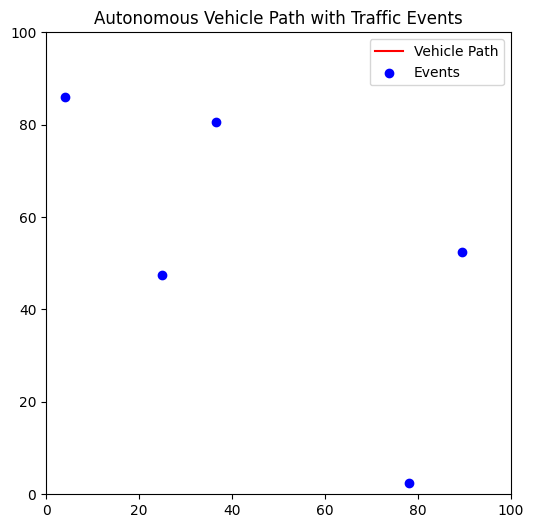

Stopped for pedestrian jaywalking.
Incorrect response for event: Pedestrian Jaywalking Detected


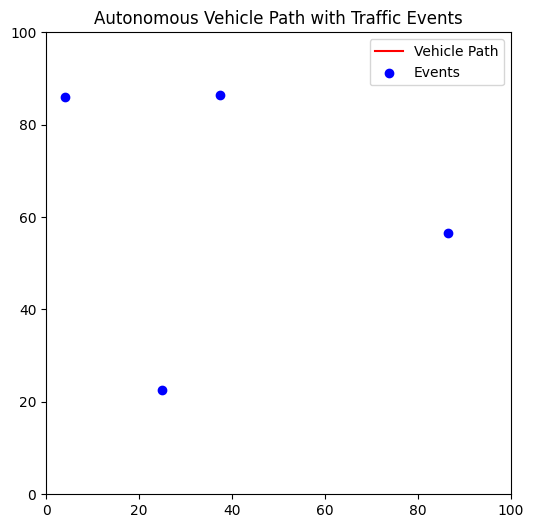

Stopped for pedestrian jaywalking.
Incorrect response for event: Pedestrian Jaywalking Detected
Stopped for pedestrian jaywalking.
Incorrect response for event: Pedestrian Jaywalking Detected
Stopped for pedestrian jaywalking.
Incorrect response for event: Pedestrian Jaywalking Detected
Stopped for pedestrian jaywalking.
Incorrect response for event: Pedestrian Jaywalking Detected
Stopped for pedestrian jaywalking.
Incorrect response for event: Pedestrian Jaywalking Detected
Stopped for pedestrian jaywalking.
Incorrect response for event: Pedestrian Jaywalking Detected
Stopped for pedestrian jaywalking.
Incorrect response for event: Pedestrian Jaywalking Detected
Stopped for pedestrian jaywalking.
Incorrect response for event: Pedestrian Jaywalking Detected
Stopped for pedestrian jaywalking.
Incorrect response for event: Pedestrian Jaywalking Detected
Stopped for pedestrian jaywalking.
Incorrect response for event: Pedestrian Jaywalking Detected
Stopped for pedestrian jaywalking.
Incor

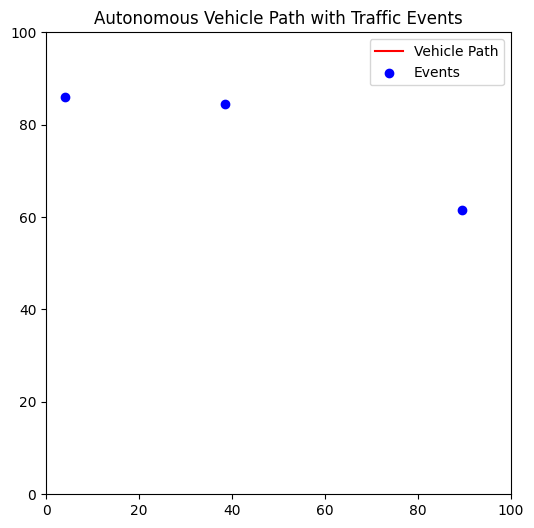

Stopped for pedestrian jaywalking.
Incorrect response for event: Pedestrian Jaywalking Detected
Stopped for pedestrian jaywalking.
Incorrect response for event: Pedestrian Jaywalking Detected


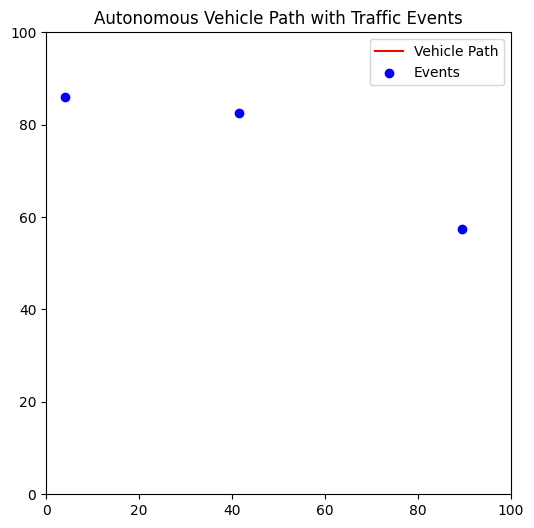

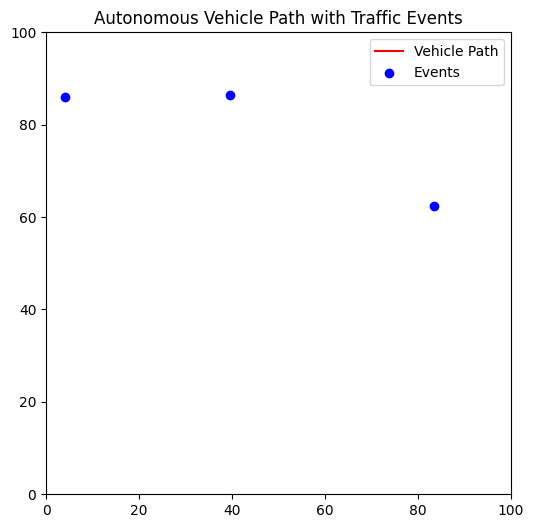

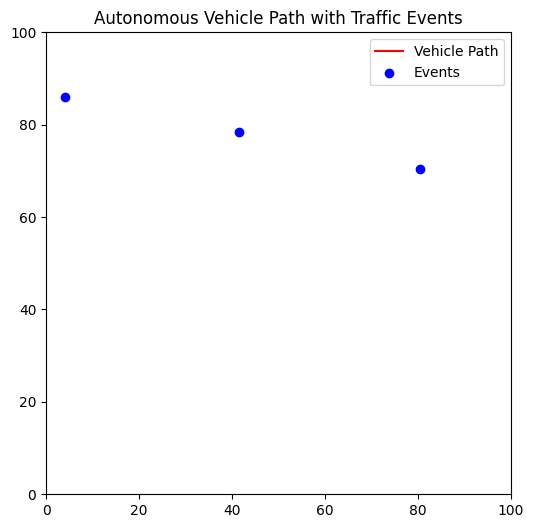

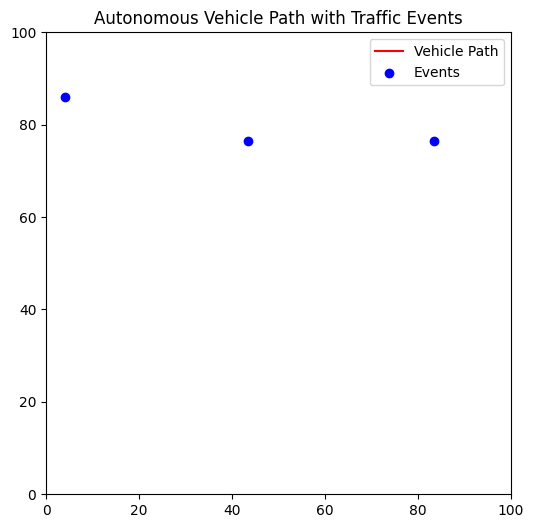

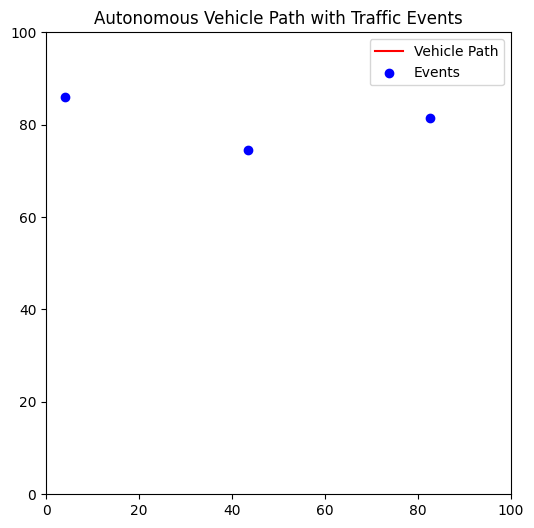

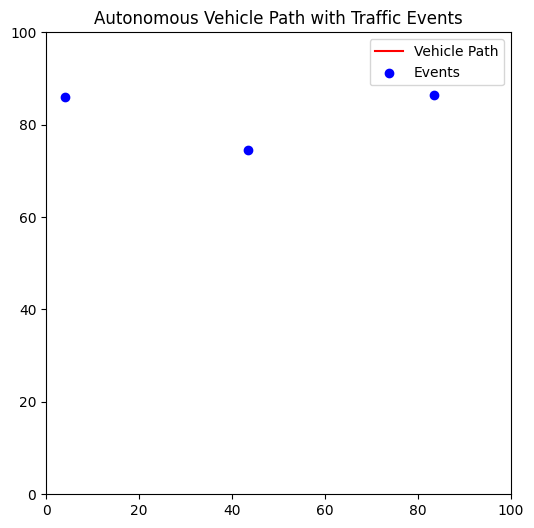

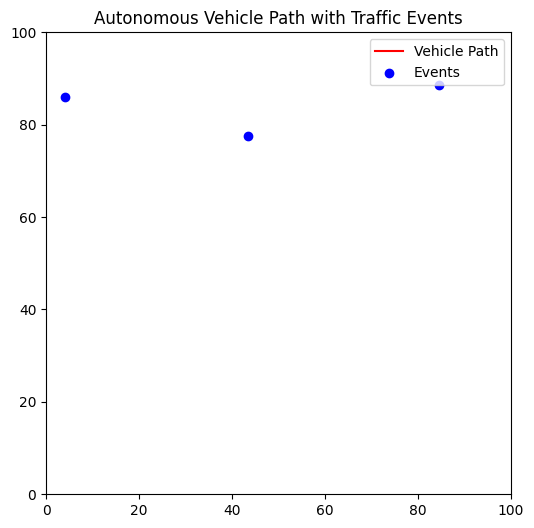

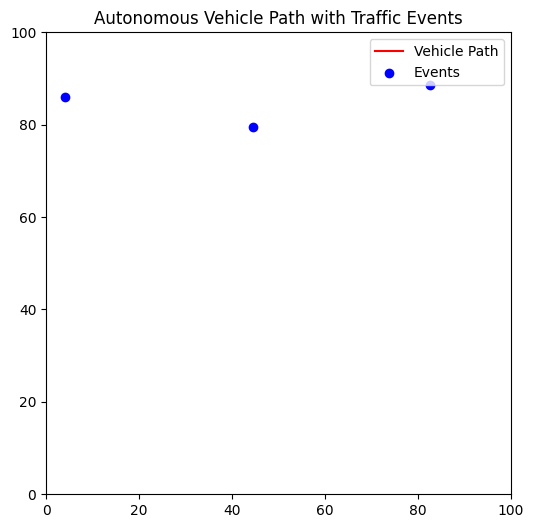

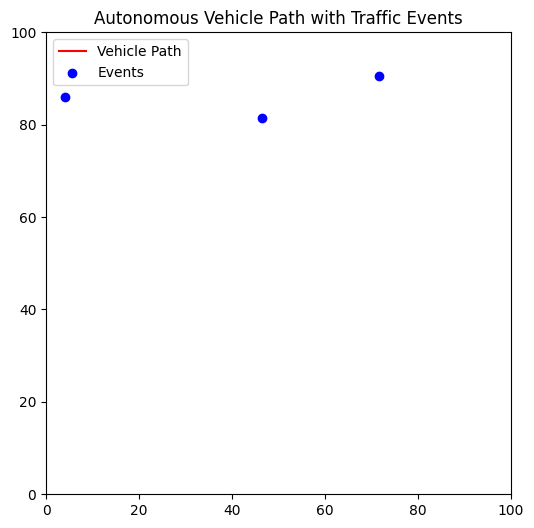

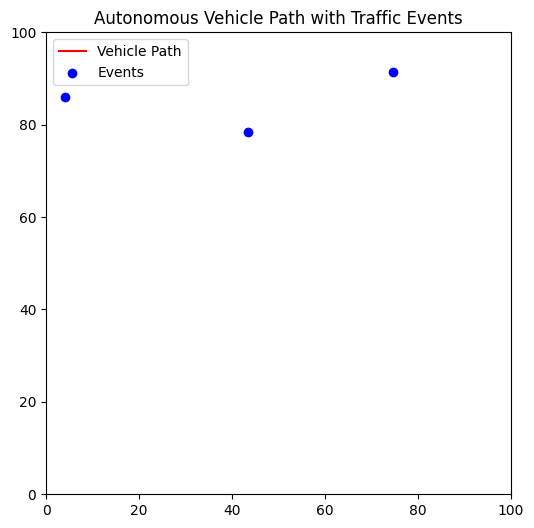

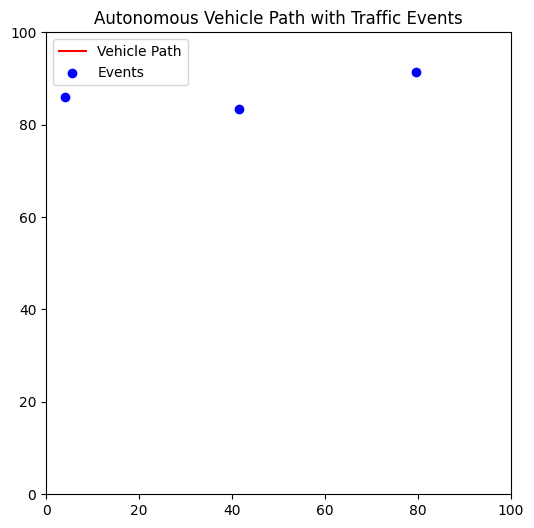

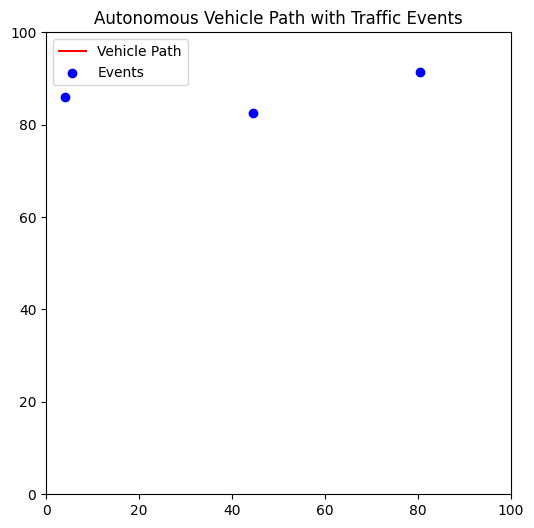

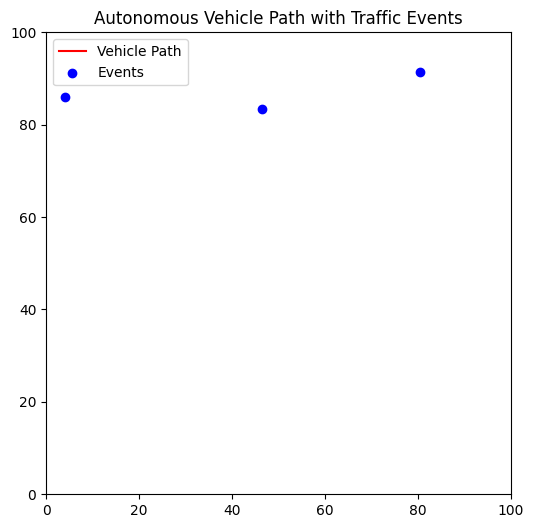

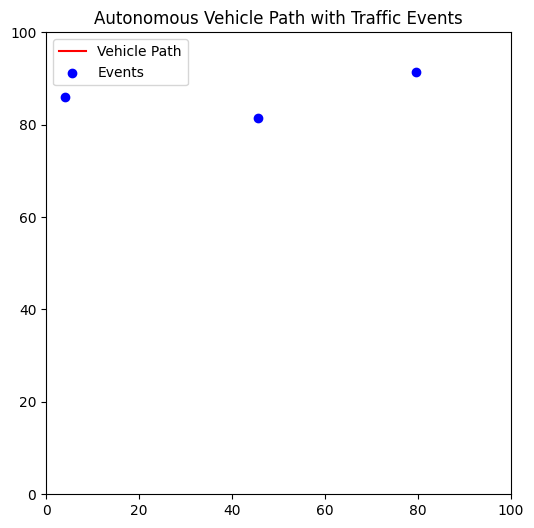

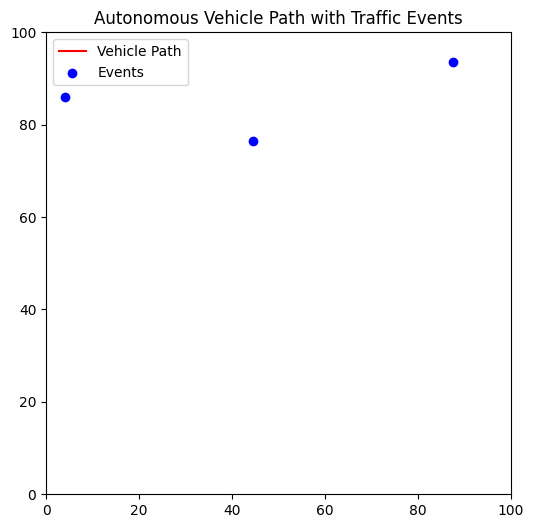

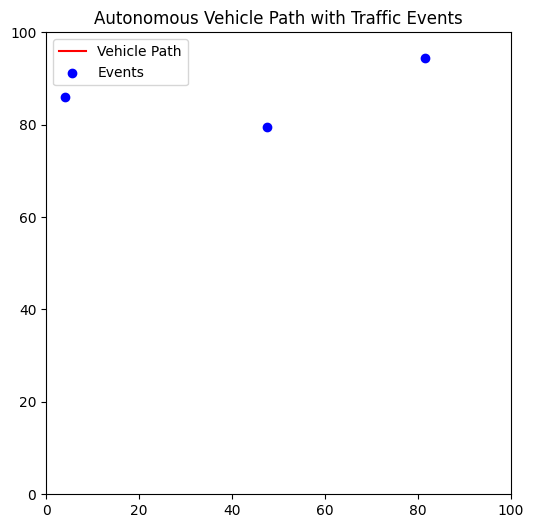

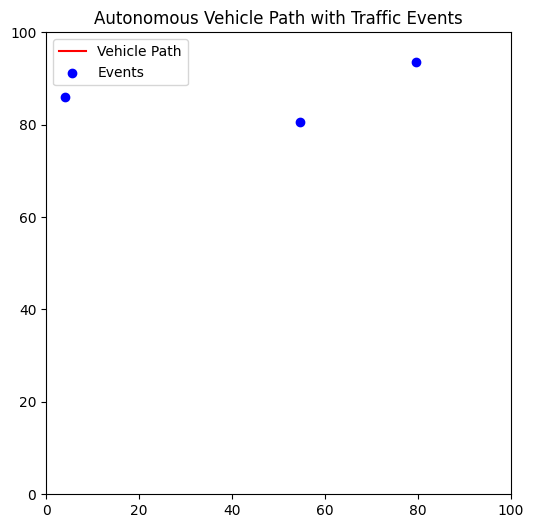

In [ ]:
# Import necessary libraries
import numpy as np
import random
import matplotlib.pyplot as plt

# Constants
MAP_DIMENSIONS = (100, 100)  # Dimensions of the city map in meters
VEHICLE_SIZE = (2, 4)  # Size of the autonomous vehicle (width, length) in meters
SPEED_LIMIT = 10  # Maximum speed in m/s
SENSOR_RANGE = 20  # Range of sensors in meters
TIME_STEP = 0.1  # Simulation time step in seconds
TOTAL_TIME = 100  # Total simulation time

# Define Traffic Violations Types
TRAFFIC_EVENTS = {
    "u_turn": "Unexpected U-Turn",
    "jaywalking": "Pedestrian Jaywalking",
    "sudden_stop": "Sudden Vehicle Stop"
}

# Define the Autonomous Vehicle Class
class AutonomousVehicle:
    def __init__(self, position, speed=0, heading=0):
        self.position = np.array(position, dtype=np.float64)  # [x, y]
        self.speed = speed  # Current speed of the vehicle
        self.heading = heading  # Current heading in degrees
        self.path = []

    def update_position(self, steering_angle, acceleration, dt=TIME_STEP):
        # Update heading based on steering angle
        self.heading += steering_angle * dt
        self.heading %= 360  # Keep heading in [0, 360)

        # Update speed based on acceleration, adhering to speed limit
        self.speed += acceleration * dt
        self.speed = np.clip(self.speed, 0, SPEED_LIMIT)

        # Update position based on speed and heading
        dx = self.speed * np.cos(np.radians(self.heading)) * dt
        dy = self.speed * np.sin(np.radians(self.heading)) * dt
        self.position += np.array([dx, dy])

        # Log position for path
        self.path.append(self.position.copy())

# Traffic Event Simulation
class TrafficEvent:
    def __init__(self, position, event_type):
        self.position = np.array(position, dtype=np.float64)
        self.event_type = event_type

    def get_event_response(self):
        # Define actions for each event type
        if self.event_type == "u_turn":
            return {"action": "slow_down", "description": "Unexpected U-Turn"}
        elif self.event_type == "jaywalking":
            return {"action": "stop", "description": "Pedestrian Jaywalking Detected"}
        elif self.event_type == "sudden_stop":
            return {"action": "emergency_stop", "description": "Sudden Stop by Vehicle"}
        return {"action": "continue", "description": "No action required"}

# Event Detection with Simulated Sensors
def detect_traffic_events(vehicle, events):
    detected_events = []
    for event in events:
        distance = np.linalg.norm(vehicle.position - event.position)
        if distance <= SENSOR_RANGE:
            detected_events.append(event)
    return detected_events

# Reinforcement Learning Agent for Adaptive Responses
class QLearningAgent:
    def __init__(self, alpha=0.1, gamma=0.9, epsilon=0.1):
        self.q_table = {}
        self.alpha = alpha  # Learning rate
        self.gamma = gamma  # Discount factor
        self.epsilon = epsilon  # Exploration factor

    def get_q_value(self, state, action):
        return self.q_table.get((state, action), 0.0)

    def update_q_value(self, state, action, reward, next_state):
        next_max = max([self.get_q_value(next_state, a) for a in ["slow_down", "stop", "emergency_stop", "continue"]], default=0.0)
        current_q = self.get_q_value(state, action)
        self.q_table[(state, action)] = current_q + self.alpha * (reward + self.gamma * next_max - current_q)

    def choose_action(self, state):
        if np.random.rand() < self.epsilon:
            return np.random.choice(["slow_down", "stop", "emergency_stop", "continue"])
        q_values = {action: self.get_q_value(state, action) for action in ["slow_down", "stop", "emergency_stop", "continue"]}
        return max(q_values, key=q_values.get)

# Rule Compliance System
class TrafficRules:
    @staticmethod
    def enforce_speed_limit(vehicle):
        if vehicle.speed > SPEED_LIMIT:
            vehicle.speed = SPEED_LIMIT  # Enforce speed limit
            print("Speed limit enforced.")

    @staticmethod
    def enforce_stop_for_pedestrians(vehicle, detected_events):
        for event in detected_events:
            if event.event_type == "jaywalking":
                vehicle.speed = 0  # Stop for jaywalking
                print("Stopped for pedestrian jaywalking.")

# Simulation Environment
def simulate_traffic_compliance():
    vehicle = AutonomousVehicle(position=[10, 10])
    agent = QLearningAgent()
    events = [TrafficEvent([random.randint(0, MAP_DIMENSIONS[0]), random.randint(0, MAP_DIMENSIONS[1])], random.choice(list(TRAFFIC_EVENTS.keys()))) for _ in range(5)]

    reward = 0

    for step in range(int(TOTAL_TIME / TIME_STEP)):
        state = (int(vehicle.position[0]), int(vehicle.position[1]))

        # Detect nearby traffic events
        detected_events = detect_traffic_events(vehicle, events)

        # Choose action based on Q-learning agent
        if detected_events:
            action = agent.choose_action(detected_events[0].event_type)
        else:
            action = agent.choose_action("continue")  # Default action when no events

        # Map actions to vehicle responses
        if action == "slow_down":
            acceleration = -0.2  # Gradually slow down
            steering_angle = 0
        elif action == "stop":
            acceleration = -vehicle.speed / TIME_STEP  # Immediate stop
            steering_angle = 0
        elif action == "emergency_stop":
            acceleration = -vehicle.speed / TIME_STEP  # Hard stop for emergencies
            steering_angle = 0
        elif action == "continue":
            acceleration = 0.5  # Maintain speed
            steering_angle = 0

        # Update vehicle position
        vehicle.update_position(steering_angle, acceleration)

        # Enforce traffic rules
        TrafficRules.enforce_speed_limit(vehicle)
        TrafficRules.enforce_stop_for_pedestrians(vehicle, detected_events)

        # Reward and Q-learning update
        if detected_events:
            event_response = detected_events[0].get_event_response()
            if event_response["action"] == action:
                reward = 10  # Reward for correct response
                print(f"Correct response for event: {event_response['description']}")
            else:
                reward = -5  # Penalize for incorrect response
                print(f"Incorrect response for event: {event_response['description']}")
            agent.update_q_value(state, action, reward, "event_occurred")
        else:
            reward = 1  # Small reward for safe driving
            agent.update_q_value(state, action, reward, "no_event")

        # Update event positions for next iteration
        for event in events:
            if event.event_type == "u_turn":
                event.position += np.array([random.choice([-1, 1]) * 0.5, random.choice([-1, 1]) * 0.5])
            elif event.event_type == "jaywalking":
                event.position += np.array([0, -0.5])  # Pedestrian crosses
            elif event.event_type == "sudden_stop":
                pass  # Stays in place

        # Plot path for visualization every few steps
        if step % 50 == 0:
            plt.figure(figsize=(6, 6))
            plt.xlim(0, MAP_DIMENSIONS[0])
            plt.ylim(0, MAP_DIMENSIONS[1])
            plt.plot(*zip(*vehicle.path), 'r-', label="Vehicle Path")
            plt.scatter([e.position[0] for e in events], [e.position[1] for e in events], c='b', label="Events")
            plt.legend()
            plt.title("Autonomous Vehicle Path with Traffic Events")
            plt.show()

simulate_traffic_compliance()
